This notebook contains explanation about this first analysis over client metrics dataset...

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load write dataset
dataset_write_raw = pd.read_csv('datasets/exp_30c/20250929_175500382_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)

print(dataset_write_raw.shape)

dataset_write_raw.head(5)

(3452, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1759168500,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.0
1,1759168500,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.0
2,1759168501,9,0,0,0,4,2,0.059494,0.0,0.0,...,4,5,4.333333,0.500000,4,5.000000,5.0,5.0,5.0,5.0
3,1759168502,17,0,0,0,4,3,0.111639,0.0,0.0,...,4,5,4.312500,0.478714,4,5.000000,5.0,5.0,5.0,5.0
4,1759168503,24,0,0,0,4,1,0.156580,0.0,0.0,...,3,7,4.250000,0.793999,4,4.583333,5.9,7.0,7.0,7.0


In [15]:
# Identify columns to normalize (all except the first)
cols_to_normalize = dataset_write_raw.columns[1:]

# Extract the columns to be normalized
dataset_w_to_normalize = dataset_write_raw[cols_to_normalize]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(dataset_w_to_normalize)

# Create a new DataFrame with the normalized values
dataset_write_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=dataset_write_raw.index)

In [3]:
# Load read dataset
dataset_read_raw = pd.read_csv('datasets/exp_30c/20250929_175500382_r.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)

print(dataset_read_raw.shape)

dataset_read_raw.head(5)

(3452, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1759168500,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,1759168500,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,1759168501,3,0,0,0,11,1,0.032919,0.0,0.0,...,11,12,11.500000,0.707107,11.5,12.000000,12.0,12.0,12.0,12.0
3,1759168502,5,0,0,0,11,2,0.054269,0.0,0.0,...,11,12,11.400000,0.547723,11.0,12.000000,12.0,12.0,12.0,12.0
4,1759168503,8,0,0,0,11,2,0.085898,0.0,0.0,...,11,12,11.285714,0.487950,11.0,11.833333,12.0,12.0,12.0,12.0


In [17]:
# Identify columns to normalize (all except the first)
cols_to_normalize = dataset_read_raw.columns[1:]

# Extract the columns to be normalized
dataset_r_to_normalize = dataset_read_raw[cols_to_normalize]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(dataset_r_to_normalize)

# Create a new DataFrame with the normalized values
dataset_read_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=dataset_read_raw.index)

# Line plot Timestamp x Snapshots

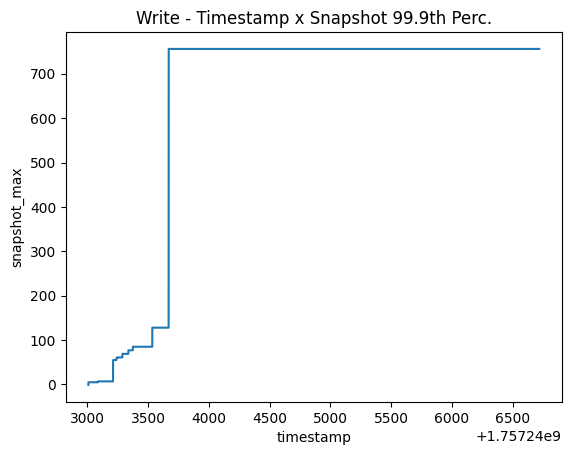

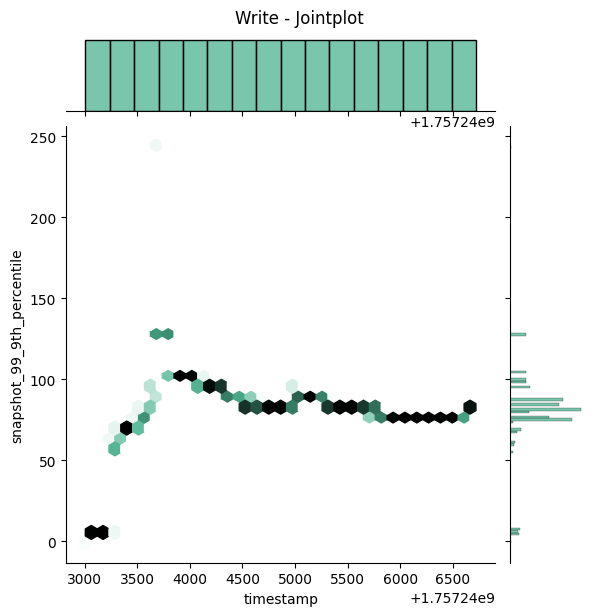

In [8]:
# Plot the responses for different timestamps and percentiles
ax = sns.lineplot(x="timestamp", y="snapshot_max",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 99.9th Perc.")
plt.show()

ax = sns.jointplot(x="timestamp", y="snapshot_99_9th_percentile", data=dataset_write_raw, kind="hex", color="#4CB391")
ax.fig.suptitle("Write - Jointplot", y=1.02)
plt.show()

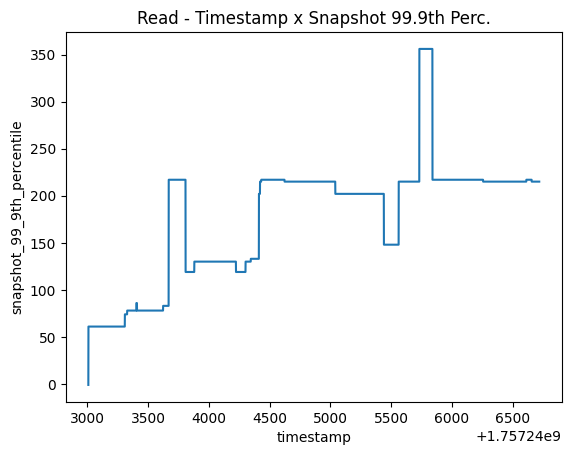

In [12]:
"# Plot the responses for different timestamps and percentiles
ax = sns.lineplot(x="timestamp", y="snapshot_99_9th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 99.9th Perc.")
plt.show()

# KDE for write dataset metrics

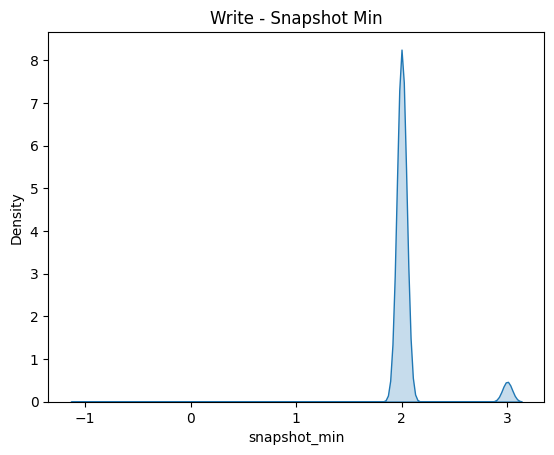

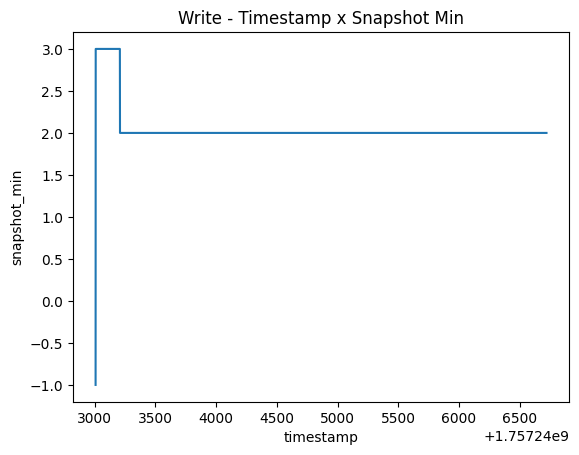

In [18]:
# snapshot_min
ax = sns.kdeplot(dataset_write_raw['snapshot_min'],fill=True)
ax.set_title("Write - Snapshot Min")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_min.png'))
plt.show()

# snapshot_min
# ax = sns.kdeplot(dataset_write_norm['snapshot_min'],fill=True)
# ax.set_title("Write - Snapshot Min")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_min.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_min",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot Min")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_min_lp.png'))
plt.show()

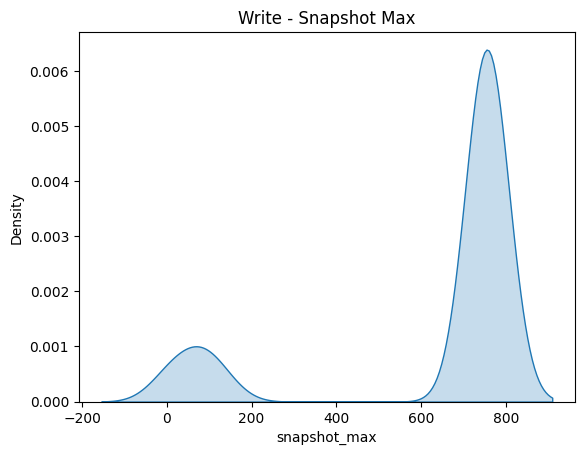

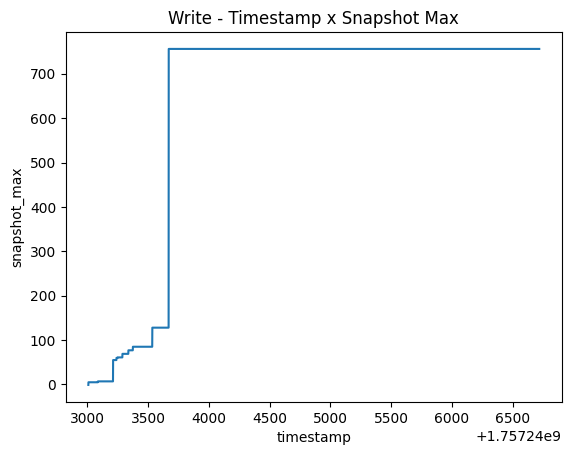

In [19]:
# snapshot_max
ax = sns.kdeplot(dataset_write_raw['snapshot_max'], fill=True)
ax.set_title("Write - Snapshot Max")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_max.png'))
plt.show()

# snapshot_max
# ax = sns.kdeplot(dataset_write_norm['snapshot_max'], fill=True)
# ax.set_title("Write - Snapshot Max")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_max.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_max",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot Max")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_max_lp.png'))
plt.show()

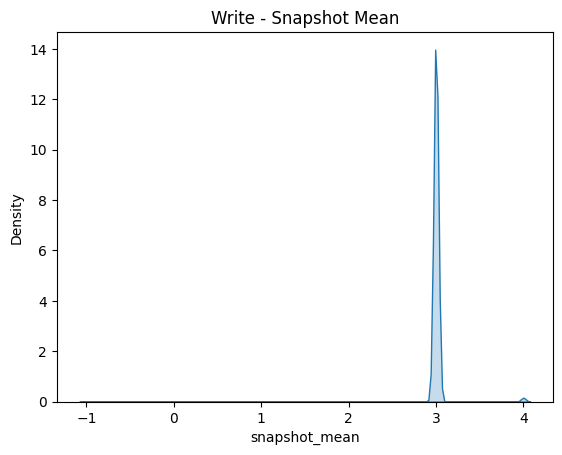

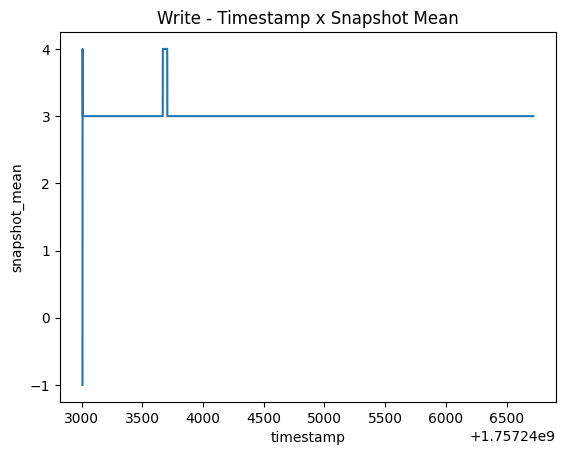

In [20]:
# snapshot_mean
ax = sns.kdeplot(dataset_write_raw['snapshot_mean'], fill=True)
ax.set_title("Write - Snapshot Mean")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_mean.png'))
plt.show()

# snapshot_mean
# ax = sns.kdeplot(dataset_write_norm['snapshot_mean'], fill=True)
# ax.set_title("Write - Snapshot Mean")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_mean.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_mean",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot Mean")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_mean_lp.png'))
plt.show()

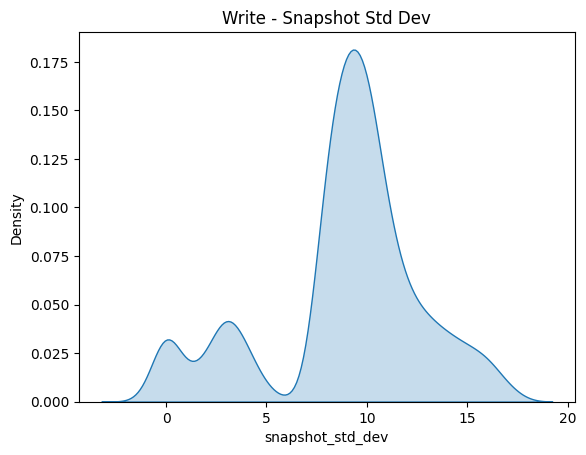

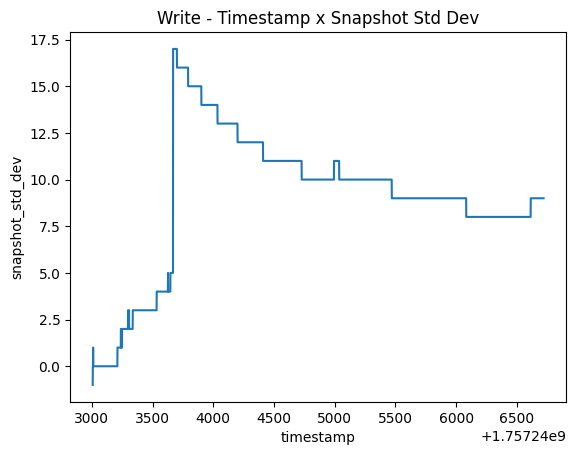

In [21]:
# snapshot_std_dev
ax = sns.kdeplot(dataset_write_raw['snapshot_std_dev'], fill=True)
ax.set_title("Write - Snapshot Std Dev")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_std_dev.png'))
plt.show()

# snapshot_std_dev
# ax = sns.kdeplot(dataset_write_norm['snapshot_std_dev'], fill=True)
# ax.set_title("Write - Snapshot Std Dev")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_std_dev.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_std_dev",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot Std Dev")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_std_dev_lp.png'))
plt.show()

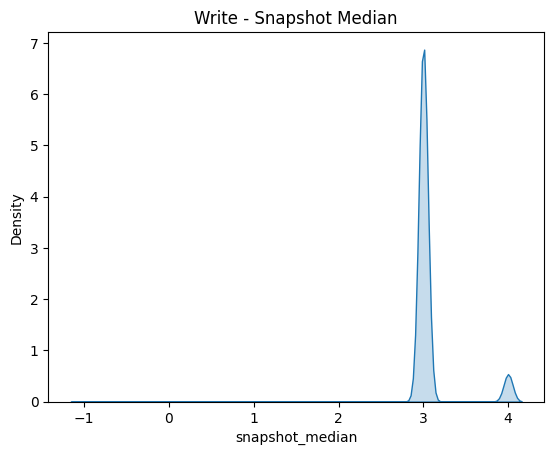

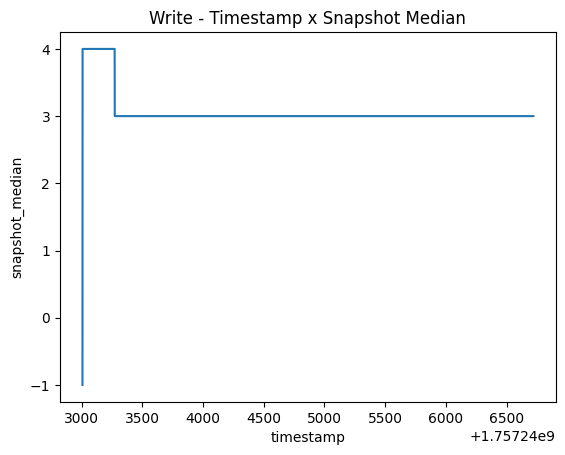

In [22]:
# snapshot_median
ax = sns.kdeplot(dataset_write_raw['snapshot_median'], fill=True)
ax.set_title("Write - Snapshot Median")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_median.png'))
plt.show()

# snapshot_median
# ax = sns.kdeplot(dataset_write_norm['snapshot_median'], fill=True)
# ax.set_title("Write - Snapshot Median")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_median.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_median",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot Median")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_median_lp.png'))
plt.show()

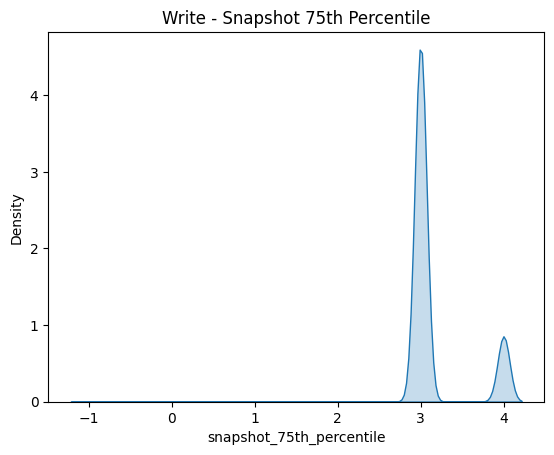

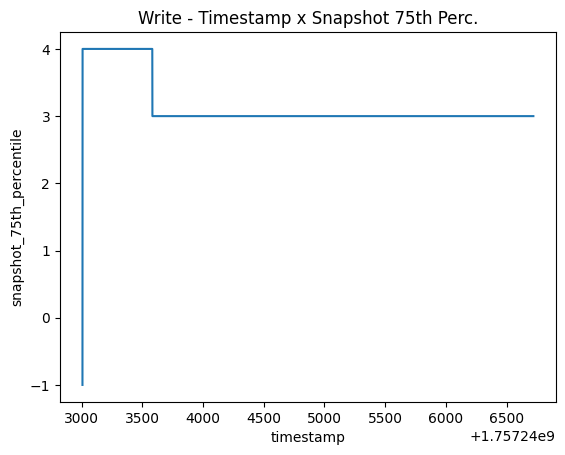

In [23]:
# snapshot_75th_percentile
ax = sns.kdeplot(dataset_write_raw['snapshot_75th_percentile'], fill=True)
ax.set_title("Write - Snapshot 75th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_75_perc.png'))
plt.show()

# snapshot_75th_percentile
# ax = sns.kdeplot(dataset_write_norm['snapshot_75th_percentile'], fill=True)
# ax.set_title("Write - Snapshot 75th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_75_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_75th_percentile",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 75th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_75_perc_lp.png'))
plt.show()

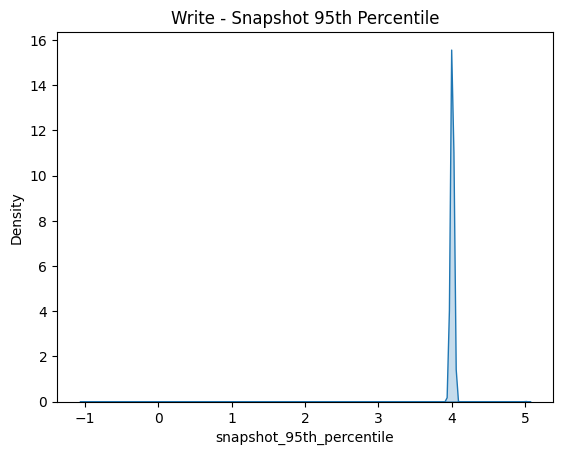

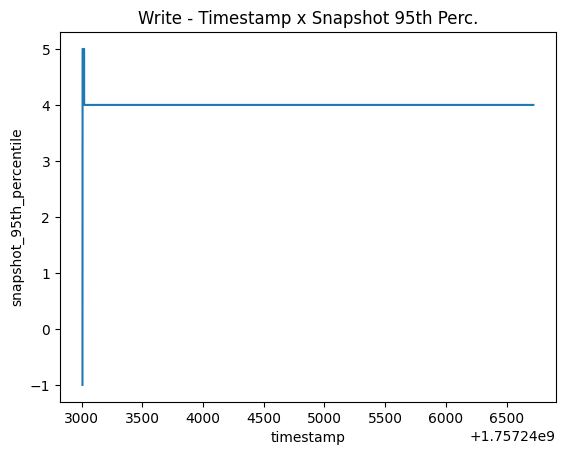

In [24]:
# snapshot_95th_percentile
ax = sns.kdeplot(dataset_write_raw['snapshot_95th_percentile'], fill=True)
ax.set_title("Write - Snapshot 95th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_95_perc.png'))
plt.show()

# snapshot_95th_percentile
# ax = sns.kdeplot(dataset_write_norm['snapshot_95th_percentile'], fill=True)
# ax.set_title("Write - Snapshot 95th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_95_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_95th_percentile",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 95th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_95_perc_lp.png'))
plt.show()

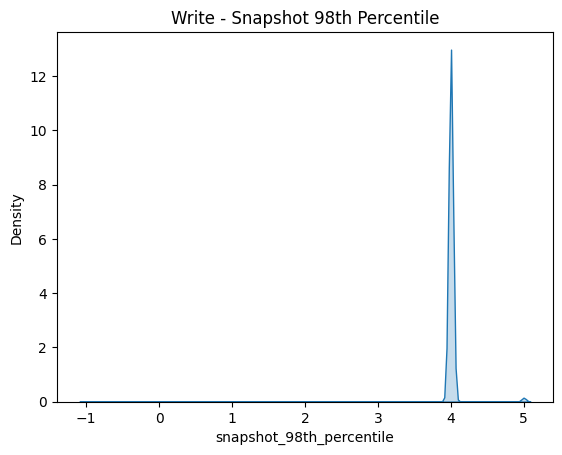

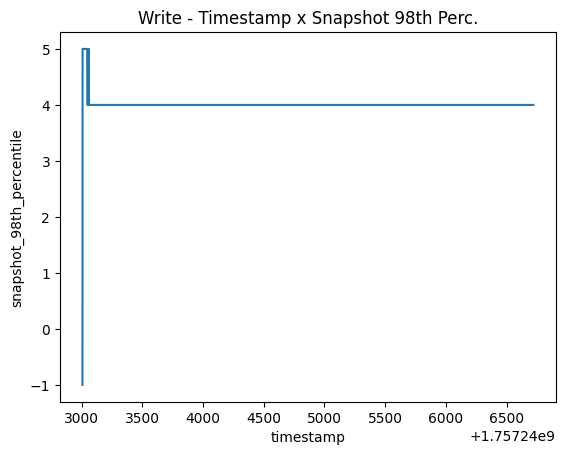

In [26]:
# snapshot_98th_percentile
ax = sns.kdeplot(dataset_write_raw['snapshot_98th_percentile'], fill=True)
ax.set_title("Write - Snapshot 98th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_98_perc.png'))
plt.show()

# snapshot_98th_percentile
# ax = sns.kdeplot(dataset_write_norm['snapshot_98th_percentile'], fill=True)
# ax.set_title("Write - Snapshot 98th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_98_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_98th_percentile",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 98th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_98_perc_lp.png'))
plt.show()

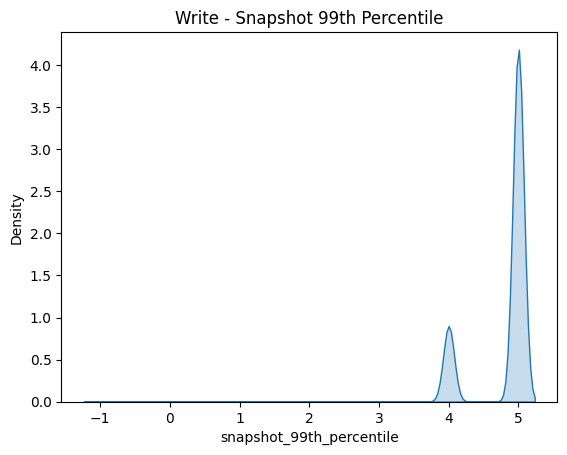

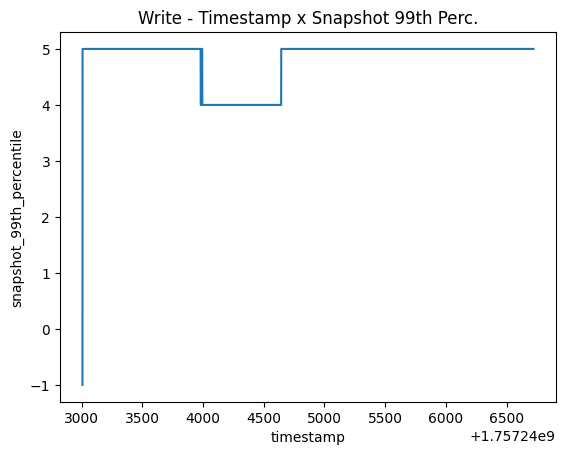

In [27]:
# snapshot_99th_percentile
ax = sns.kdeplot(dataset_write_raw['snapshot_99th_percentile'], fill=True)
ax.set_title("Write - Snapshot 99th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99_perc.png'))
plt.show()

# snapshot_99th_percentile
# ax = sns.kdeplot(dataset_write_norm['snapshot_99th_percentile'], fill=True)
# ax.set_title("Write - Snapshot 99th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_99_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_99th_percentile",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 99th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99_perc_lp.png'))
plt.show()

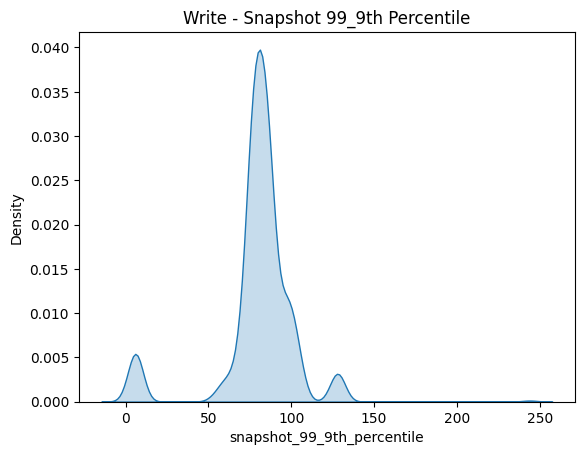

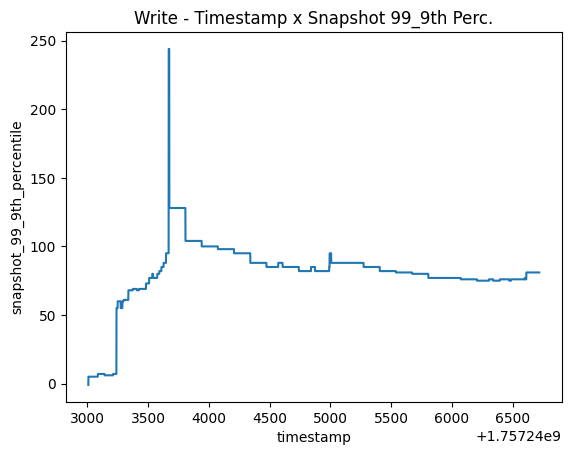

In [28]:
# snapshot_99_9th_percentile
ax = sns.kdeplot(dataset_write_raw['snapshot_99_9th_percentile'], fill=True)
ax.set_title("Write - Snapshot 99_9th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99_9_perc.png'))
plt.show()

# snapshot_99_9th_percentile
# ax = sns.kdeplot(dataset_write_norm['snapshot_99_9th_percentile'], fill=True)
# ax.set_title("Write - Snapshot 99_9th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_write_metrics_snap_99_9_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_99_9th_percentile",
             data=dataset_write_raw)
ax.set_title("Write - Timestamp x Snapshot 99_9th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99_9_perc_lp.png'))
plt.show()

# KDE for read dataset metrics

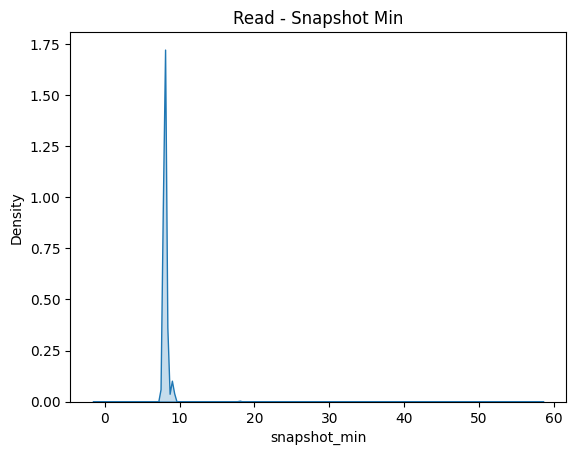

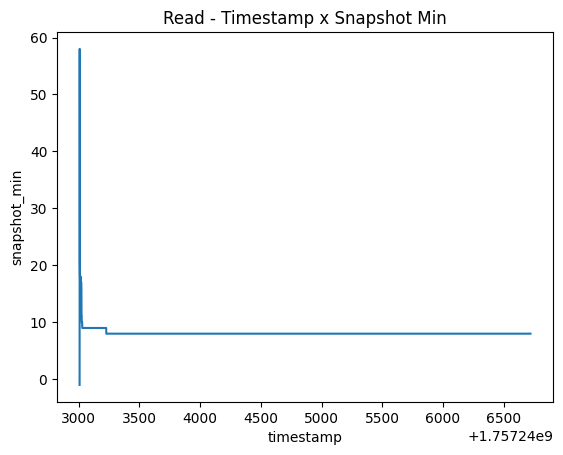

In [29]:
# snapshot_min
ax = sns.kdeplot(dataset_read_raw['snapshot_min'],fill=True)
ax.set_title("Read - Snapshot Min")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_min.png'))
plt.show()

# snapshot_min
# ax = sns.kdeplot(dataset_read_norm['snapshot_min'],fill=True)
# ax.set_title("Read - Snapshot Min")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_min.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_min",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot Min")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_min_lp.png'))
plt.show()

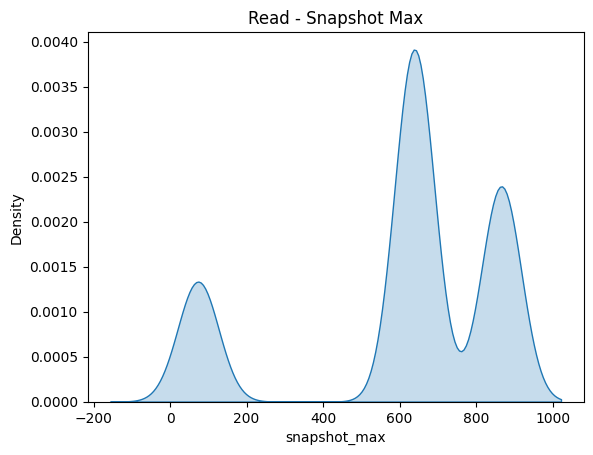

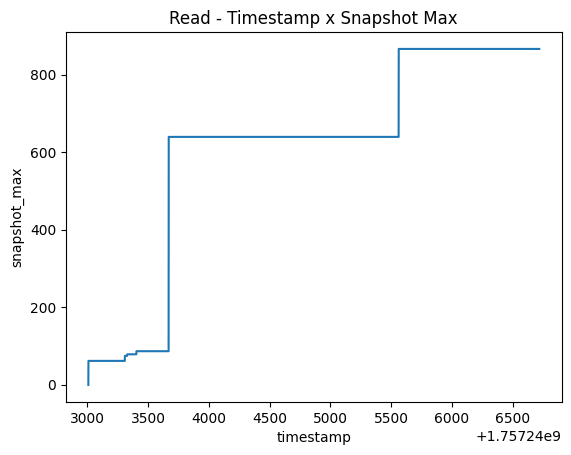

In [30]:
# snapshot_max
ax = sns.kdeplot(dataset_read_raw['snapshot_max'], fill=True)
ax.set_title("Read - Snapshot Max")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_max.png'))
plt.show()

# snapshot_max
# ax = sns.kdeplot(dataset_read_norm['snapshot_max'], fill=True)
# ax.set_title("Read - Snapshot Max")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_max.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_max",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot Max")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_max_lp.png'))
plt.show()

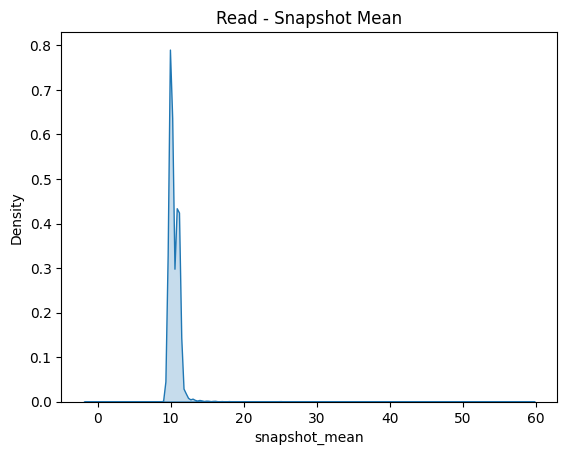

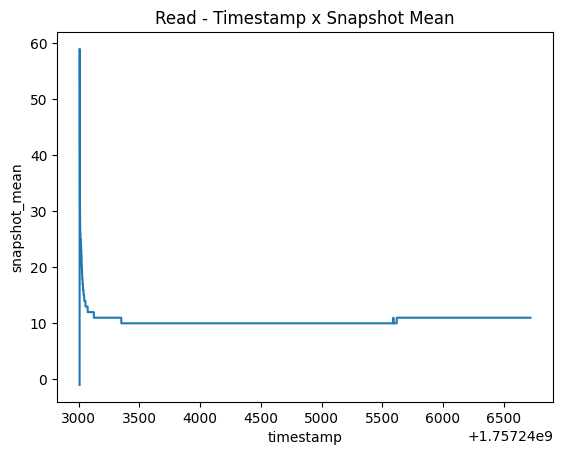

In [31]:
# snapshot_mean
ax = sns.kdeplot(dataset_read_raw['snapshot_mean'], fill=True)
ax.set_title("Read - Snapshot Mean")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_mean.png'))
plt.show()

# snapshot_mean
# ax = sns.kdeplot(dataset_read_norm['snapshot_mean'], fill=True)
# ax.set_title("Read - Snapshot Mean")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_mean.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_mean",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot Mean")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_mean_lp.png'))
plt.show()

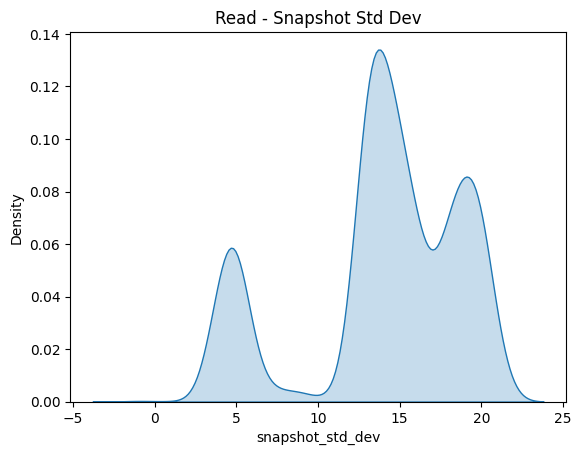

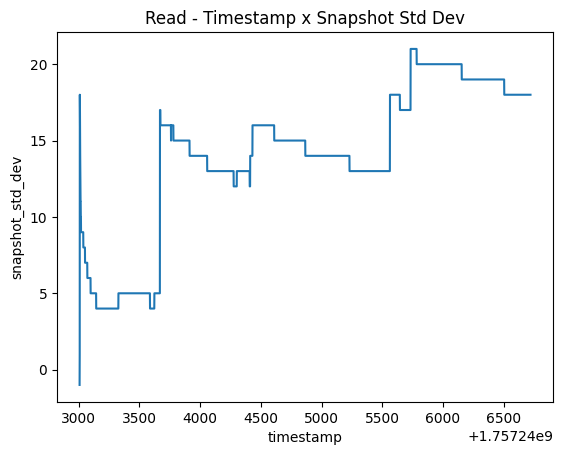

In [32]:
# snapshot_std_dev
ax = sns.kdeplot(dataset_read_raw['snapshot_std_dev'], fill=True)
ax.set_title("Read - Snapshot Std Dev")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_std_dev.png'))
plt.show()

# snapshot_std_dev
# ax = sns.kdeplot(dataset_read_norm['snapshot_std_dev'], fill=True)
# ax.set_title("Read - Snapshot Std Dev")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_std_dev.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_std_dev",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot Std Dev")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_std_dev_lp.png'))
plt.show()

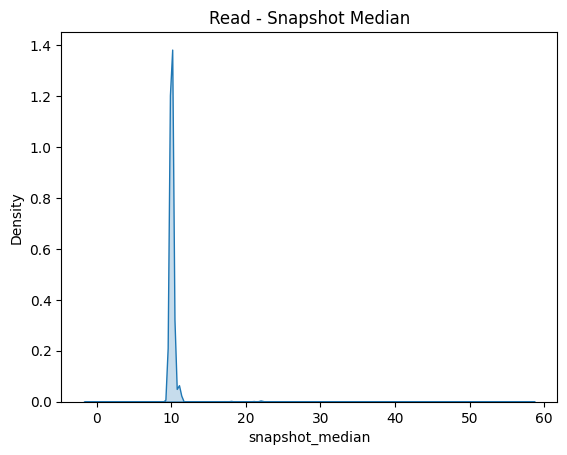

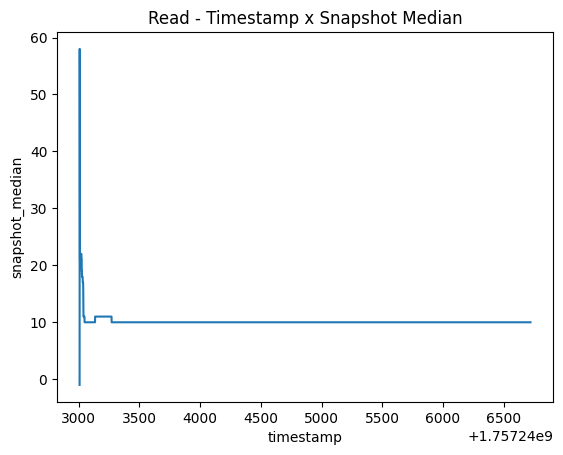

In [33]:
# snapshot_median
ax = sns.kdeplot(dataset_read_raw['snapshot_median'], fill=True)
ax.set_title("Read - Snapshot Median")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_median.png'))
plt.show()

# snapshot_median
# ax = sns.kdeplot(dataset_read_norm['snapshot_median'], fill=True)
# ax.set_title("Read - Snapshot Median")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_median.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_median",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot Median")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_median_lp.png'))
plt.show()

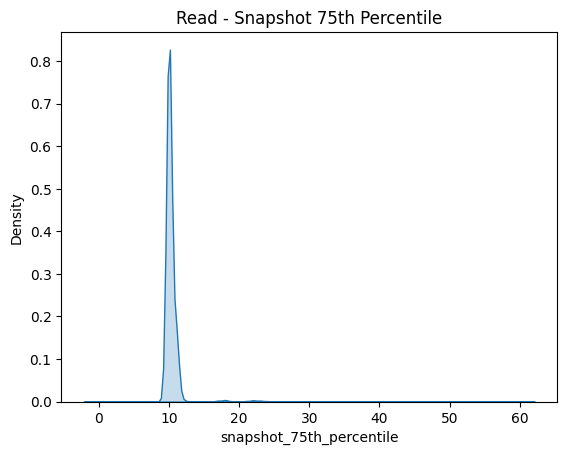

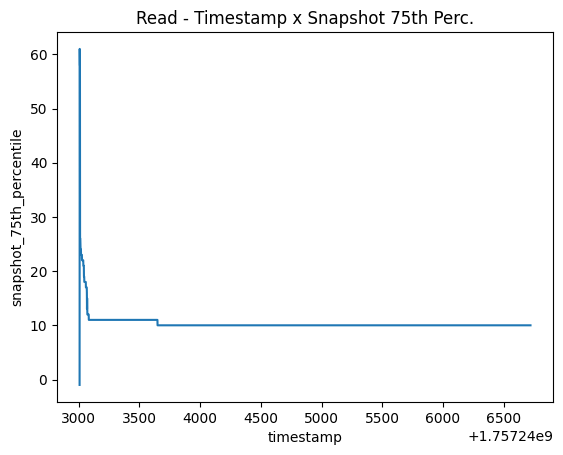

In [34]:
# snapshot_75th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_75th_percentile'], fill=True)
ax.set_title("Read - Snapshot 75th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_75_perc.png'))
plt.show()

# snapshot_75th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_75th_percentile'], fill=True)
# ax.set_title("Read - Snapshot 75th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_75_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_75th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 75th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_75_perc_lp.png'))
plt.show()

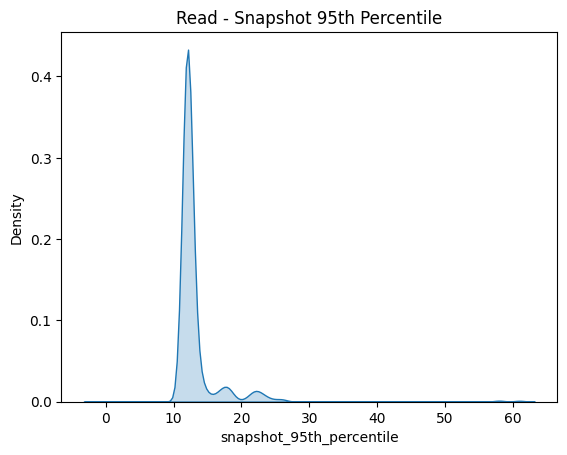

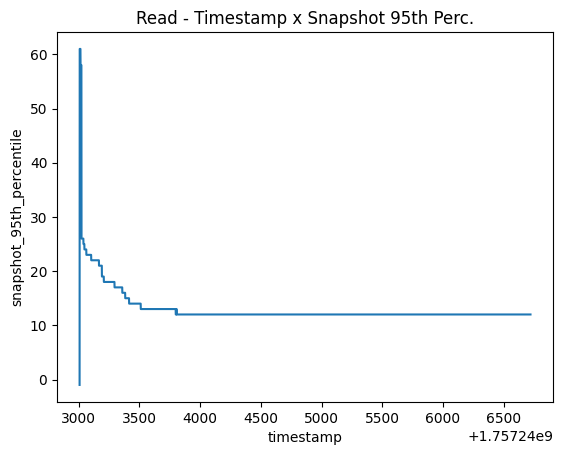

In [35]:
# snapshot_95th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_95th_percentile'], fill=True)
ax.set_title("Read - Snapshot 95th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_95_perc.png'))
plt.show()

# snapshot_95th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_95th_percentile'], fill=True)
# ax.set_title("Read - Snapshot 95th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_95_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_95th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 95th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_95_perc_lp.png'))
plt.show()

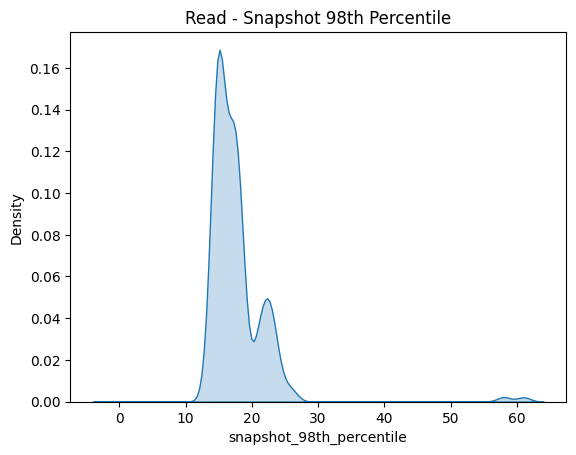

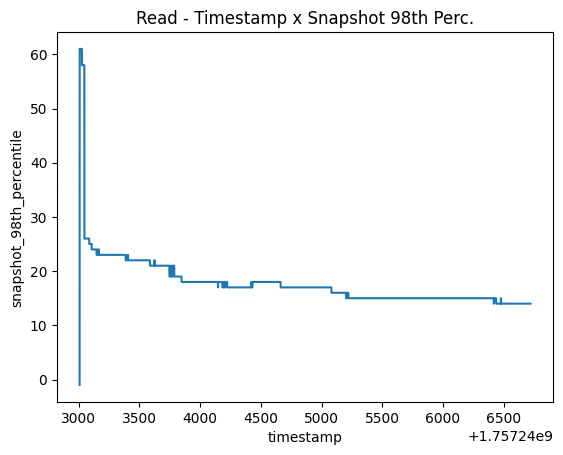

In [36]:
# snapshot_98th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_98th_percentile'], fill=True)
ax.set_title("Read - Snapshot 98th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_98_perc.png'))
plt.show()

# snapshot_98th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_98th_percentile'], fill=True)
# ax.set_title("Read - Snapshot 98th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_98_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_98th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 98th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_98_perc_lp.png'))
plt.show()

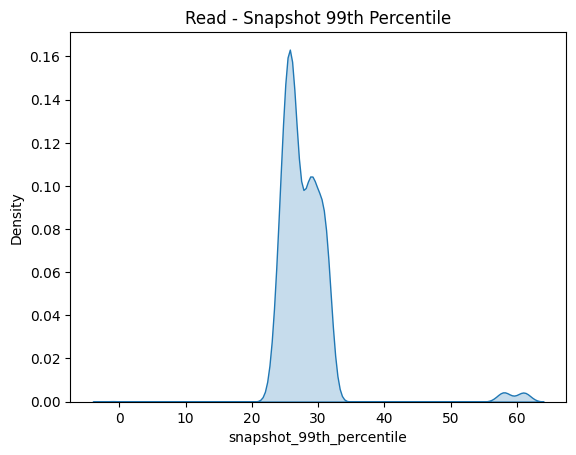

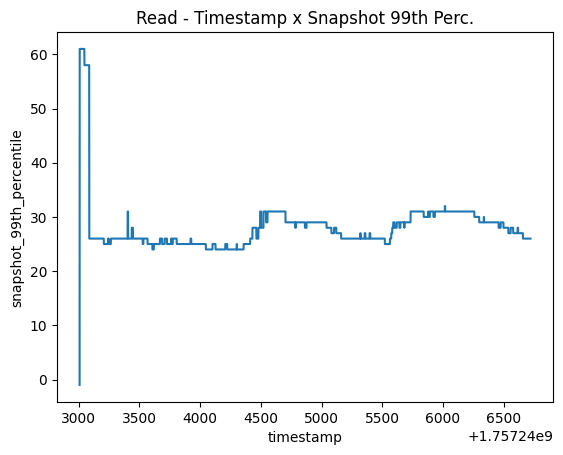

In [37]:
# snapshot_99th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_99th_percentile'], fill=True)
ax.set_title("Read - Snapshot 99th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99_perc.png'))
plt.show()

# snapshot_99th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_99th_percentile'], fill=True)
# ax.set_title("Read - Snapshot 99th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_99_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_99th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 99th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99_perc_lp.png'))
plt.show()

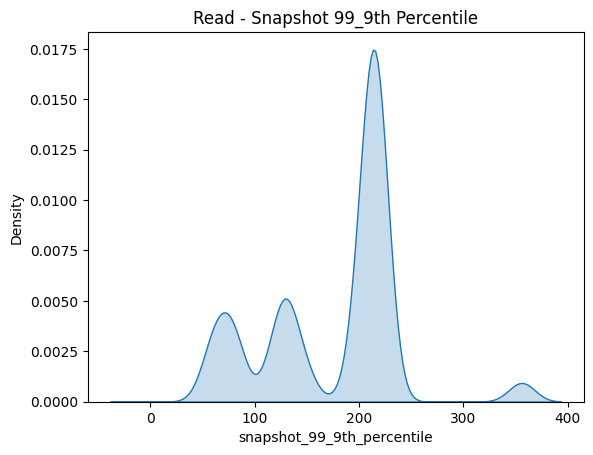

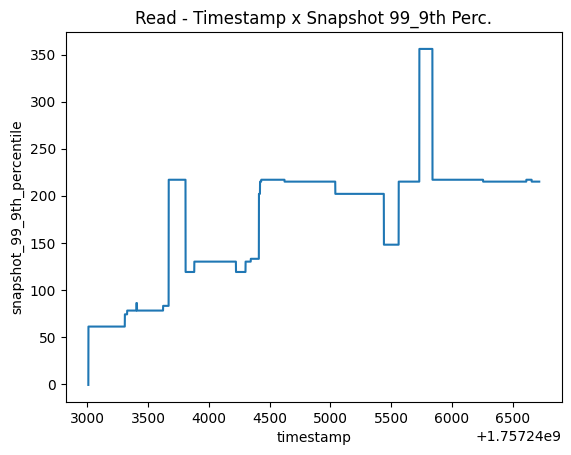

In [38]:
# snapshot_99_9th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_99_9th_percentile'], fill=True)
ax.set_title("Read - Snapshot 99_9th Percentile")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99_9_perc.png'))
plt.show()

# snapshot_99_9th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_99_9th_percentile'], fill=True)
# ax.set_title("Read - Snapshot 99_9th Percentile")
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_metrics_snap_99_9_perc.png'))
# plt.show()

# lineplot timestamps x snapshot
ax = sns.lineplot(x="timestamp", y="snapshot_99_9th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 99_9th Perc.")
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99_9_perc_lp.png'))
plt.show()

# KDE for read and write dataset metrics

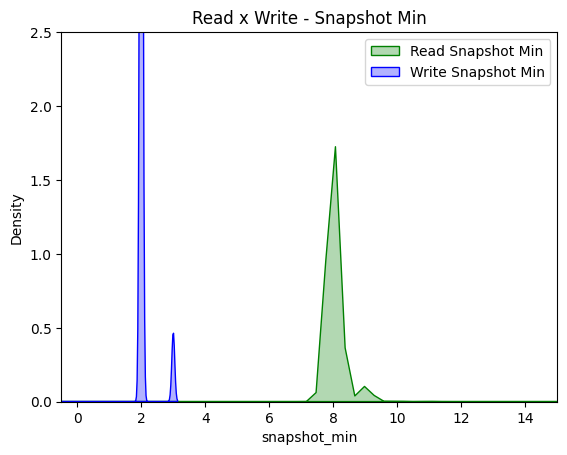

In [39]:
# snapshot_min
ax = sns.kdeplot(dataset_read_raw['snapshot_min'], color='green', fill=True, label='Read Snapshot Min', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_min'], color='b', fill=True, label='Write Snapshot Min', alpha=.3)
ax.set_title("Read x Write - Snapshot Min")
# Zoom in on a specific region
ax.set_xlim(-0.5, 15)
ax.set_ylim(0, 2.5)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_min.png'))
plt.show()

# snapshot_min
# ax = sns.kdeplot(dataset_read_norm['snapshot_min'], color='green', fill=True, label='Read Snapshot Min', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_min'], color='b', fill=True, label='Write Snapshot Min', alpha=.3)
# ax.set_title("Read x Write - Snapshot Min")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_min.png'))
# plt.show()

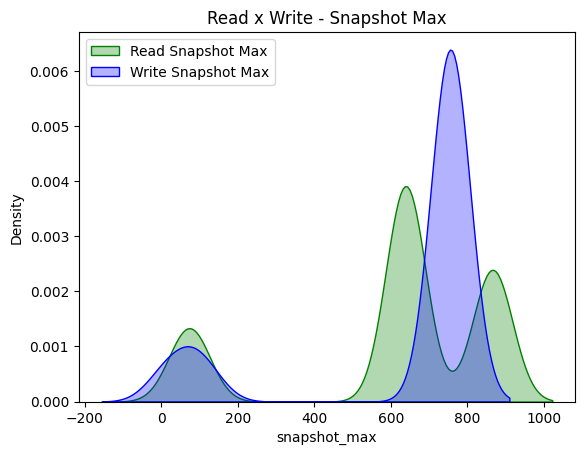

In [40]:
# snapshot_max
ax = sns.kdeplot(dataset_read_raw['snapshot_max'], color='green', fill=True, label='Read Snapshot Max', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_max'], color='b', fill=True, label='Write Snapshot Max', alpha=.3)
ax.set_title("Read x Write - Snapshot Max")
# Zoom in on a specific region
# ax.set_xlim(-0.5, 15)
# ax.set_ylim(0, 2.5)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_max.png'))
plt.show()

# snapshot_max
# ax = sns.kdeplot(dataset_read_norm['snapshot_max'], color='green', fill=True, label='Read Snapshot Max', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_max'], color='b', fill=True, label='Write Snapshot Max', alpha=.3)
# ax.set_title("Read x Write - Snapshot Max")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_max.png'))
# plt.show()

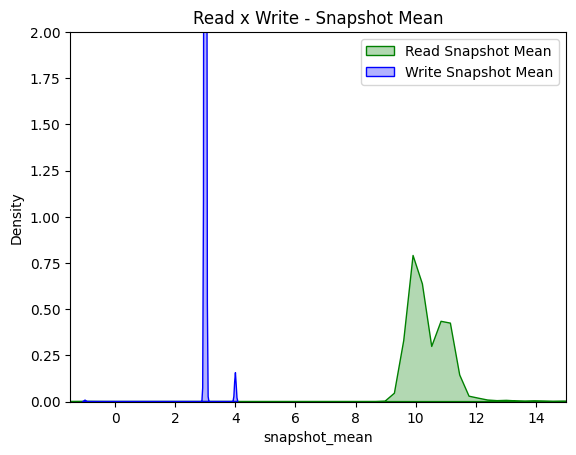

In [41]:
# snapshot_mean
ax = sns.kdeplot(dataset_read_raw['snapshot_mean'], color='green', fill=True, label='Read Snapshot Mean', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_mean'], color='b', fill=True, label='Write Snapshot Mean', alpha=.3)
ax.set_title("Read x Write - Snapshot Mean")
# Zoom in on a specific region
ax.set_xlim(-1.5, 15)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_mean.png'))
plt.show()

# snapshot_mean
# ax = sns.kdeplot(dataset_read_norm['snapshot_mean'], color='green', fill=True, label='Read Snapshot Mean', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_mean'], color='b', fill=True, label='Write Snapshot Mean', alpha=.3)
# ax.set_title("Read x Write - Snapshot Mean")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_mean.png'))
# plt.show()

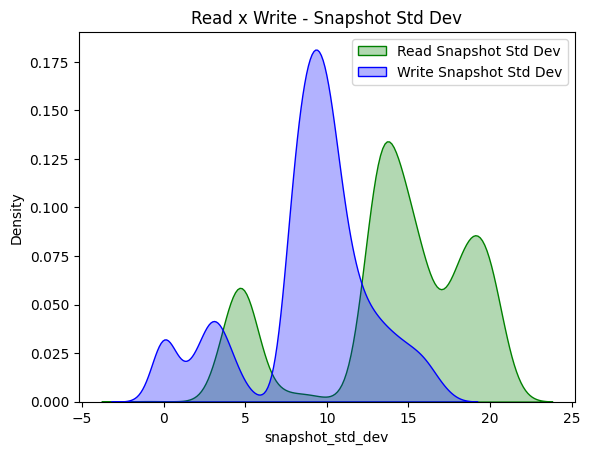

In [42]:
# snapshot_std_dev
ax = sns.kdeplot(dataset_read_raw['snapshot_std_dev'], color='green', fill=True, label='Read Snapshot Std Dev', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_std_dev'], color='b', fill=True, label='Write Snapshot Std Dev', alpha=.3)
ax.set_title("Read x Write - Snapshot Std Dev")
# Zoom in on a specific region
# ax.set_xlim(-1.5, 15)
# ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_std_dev.png'))
plt.show()

# snapshot_std_dev
# ax = sns.kdeplot(dataset_read_norm['snapshot_std_dev'], color='green', fill=True, label='Read Snapshot Std Dev', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_std_dev'], color='b', fill=True, label='Write Snapshot Std Dev', alpha=.3)
# ax.set_title("Read x Write - Snapshot Std Dev")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_std_dev.png'))
# plt.show()

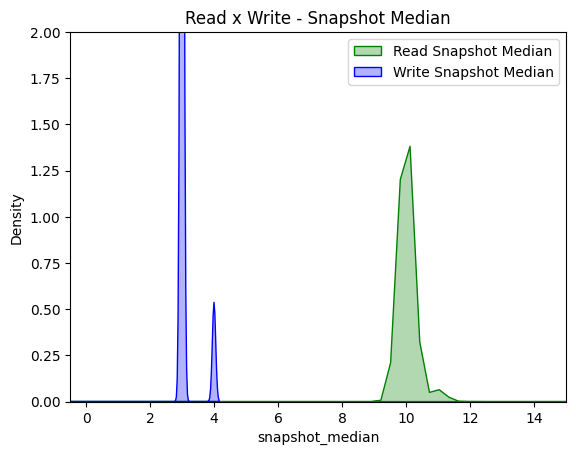

In [43]:
# snapshot_median
ax = sns.kdeplot(dataset_read_raw['snapshot_median'], color='green', fill=True, label='Read Snapshot Median', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_median'], color='b', fill=True, label='Write Snapshot Median', alpha=.3)
ax.set_title("Read x Write - Snapshot Median")
# Zoom in on a specific region
ax.set_xlim(-0.5, 15)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_median.png'))
plt.show()

# snapshot_median
# ax = sns.kdeplot(dataset_read_norm['snapshot_median'], color='green', fill=True, label='Read Snapshot Median', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_median'], color='b', fill=True, label='Write Snapshot Median', alpha=.3)
# ax.set_title("Read x Write - Snapshot Median")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_median.png'))
# plt.show()

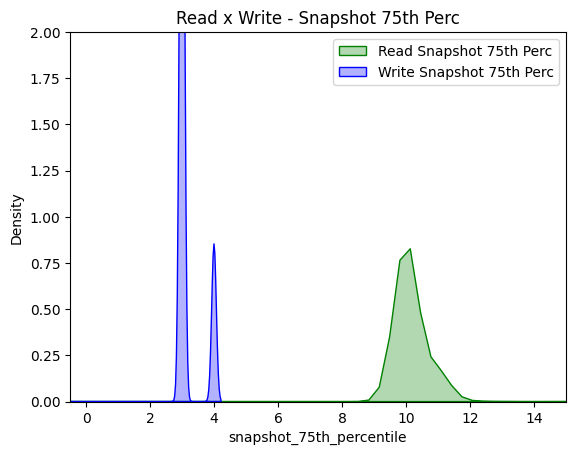

In [44]:
# snapshot_75th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_75th_percentile'], color='green', fill=True, label='Read Snapshot 75th Perc', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_75th_percentile'], color='b', fill=True, label='Write Snapshot 75th Perc', alpha=.3)
ax.set_title("Read x Write - Snapshot 75th Perc")
# Zoom in on a specific region
ax.set_xlim(-0.5, 15)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_75_perc.png'))
plt.show()

# snapshot_75th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_75th_percentile'], color='green', fill=True, label='Read Snapshot 75th Perc', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_75th_percentile'], color='b', fill=True, label='Write Snapshot 75th Perc', alpha=.3)
# ax.set_title("Read x Write - Snapshot 75th Perc")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_75_perc.png'))
# plt.show()

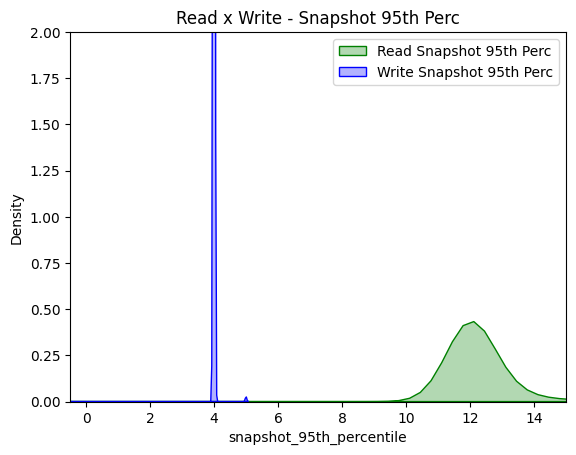

In [45]:
# snapshot_95th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_95th_percentile'], color='green', fill=True, label='Read Snapshot 95th Perc', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_95th_percentile'], color='b', fill=True, label='Write Snapshot 95th Perc', alpha=.3)
ax.set_title("Read x Write - Snapshot 95th Perc")
# Zoom in on a specific region
ax.set_xlim(-0.5, 15)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_95_perc.png'))
plt.show()

# snapshot_95th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_95th_percentile'], color='green', fill=True, label='Read Snapshot 95th Perc', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_95th_percentile'], color='b', fill=True, label='Write Snapshot 95th Perc', alpha=.3)
# ax.set_title("Read x Write - Snapshot 95th Perc")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_95_perc.png'))
# plt.show()

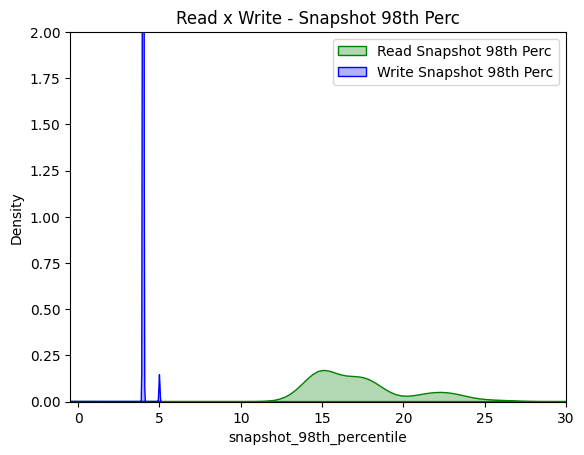

In [46]:
# snapshot_98th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_98th_percentile'], color='green', fill=True, label='Read Snapshot 98th Perc', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_98th_percentile'], color='b', fill=True, label='Write Snapshot 98th Perc', alpha=.3)
ax.set_title("Read x Write - Snapshot 98th Perc")
# Zoom in on a specific region
ax.set_xlim(-0.5, 30)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_98_perc.png'))
plt.show()

# snapshot_98th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_98th_percentile'], color='green', fill=True, label='Read Snapshot 98th Perc', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_98th_percentile'], color='b', fill=True, label='Write Snapshot 98th Perc', alpha=.3)
# ax.set_title("Read x Write - Snapshot 98th Perc")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_98_perc.png'))
# plt.show()

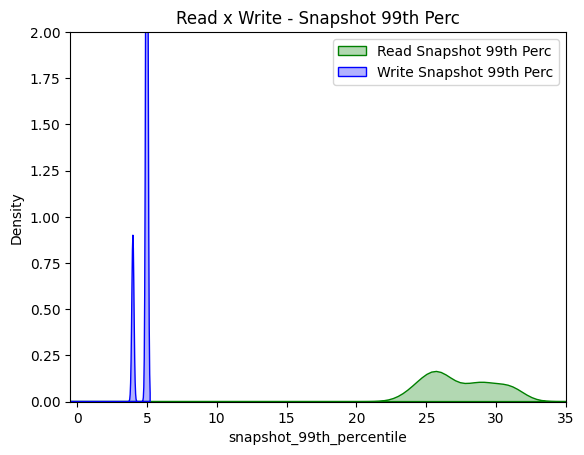

In [47]:
# snapshot_99th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_99th_percentile'], color='green', fill=True, label='Read Snapshot 99th Perc', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_99th_percentile'], color='b', fill=True, label='Write Snapshot 99th Perc', alpha=.3)
ax.set_title("Read x Write - Snapshot 99th Perc")
# Zoom in on a specific region
ax.set_xlim(-0.5, 35)
ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_99_perc.png'))
plt.show()

# snapshot_99th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_99th_percentile'], color='green', fill=True, label='Read Snapshot 99th Perc', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_99th_percentile'], color='b', fill=True, label='Write Snapshot 99th Perc', alpha=.3)
# ax.set_title("Read x Write - Snapshot 99th Perc")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_99_perc.png'))
# plt.show()

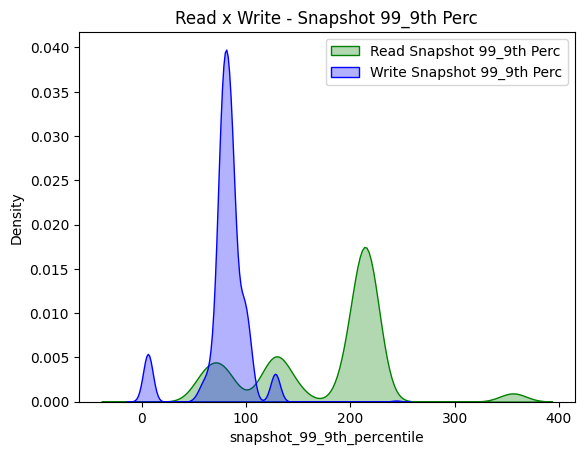

In [48]:
# snapshot_99_9th_percentile
ax = sns.kdeplot(dataset_read_raw['snapshot_99_9th_percentile'], color='green', fill=True, label='Read Snapshot 99_9th Perc', alpha=.3)
ax = sns.kdeplot(dataset_write_raw['snapshot_99_9th_percentile'], color='b', fill=True, label='Write Snapshot 99_9th Perc', alpha=.3)
ax.set_title("Read x Write - Snapshot 99_9th Perc")
# Zoom in on a specific region
# ax.set_xlim(-0.5, 15)
# ax.set_ylim(0, 2)
plt.legend()
plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_99_9_perc.png'))
plt.show()

# snapshot_99_9th_percentile
# ax = sns.kdeplot(dataset_read_norm['snapshot_99_9th_percentile'], color='green', fill=True, label='Read Snapshot 99_9th Perc', alpha=.3)
# ax = sns.kdeplot(dataset_write_norm['snapshot_99_9th_percentile'], color='b', fill=True, label='Write Snapshot 99_9th Perc', alpha=.3)
# ax.set_title("Read x Write - Snapshot 99_9th Perc")
# plt.legend()
# plt.savefig(os.path.join('images/exp_30c', 'norm_read_write_metrics_snap_99_9_perc.png'))
# plt.show()